# Posttest 6

Nurulfiqri Istiqamah Tahir <br>
2009106083

### Import Package

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

### Read Dataset

In [3]:
df = pd.read_csv("titlesSupervised.csv")
df

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Movie,Show
0,0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1,tt0047500,6.510861,23439.382474,0.600000,6.829175,0.0,1.0
1,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],2,tt0075314,8.200000,808582.000000,40.965000,8.179000,1.0,0.0
2,2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],2,tt0068473,7.700000,107673.000000,10.010000,7.300000,1.0,0.0
3,3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],2,tt0071853,8.200000,534486.000000,15.461000,7.811000,1.0,0.0
4,4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,TV-MA,150,"['war', 'action']","['GB', 'US']",2,tt0061578,7.700000,72662.000000,20.398000,7.600000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,TV-MA,100,"['romance', 'drama']",['NG'],2,tt13857480,6.800000,45.000000,1.466000,6.829175,1.0,0.0
5846,5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,TV-MA,134,['drama'],[],2,tt11803618,7.700000,348.000000,22.637925,6.829175,1.0,0.0
5847,5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,TV-MA,90,['comedy'],['CO'],2,tt14585902,3.800000,68.000000,26.005000,6.300000,1.0,0.0
5848,5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],2,tt0047500,6.510861,23439.382474,1.296000,10.000000,1.0,0.0


## 1. Data Cleaning

In [4]:
dataset_cleaning = df.copy()

In [5]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

Modus

In [6]:
dataset_cleaning['imdb_score'] = imputer_mean.fit_transform(dataset_cleaning[['imdb_score']])

dataset_cleaning.isna().sum()

Unnamed: 0              0
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
Movie                   0
Show                    0
dtype: int64

Median Nilai Tengah

In [7]:
dataset_cleaning['runtime'] = imputer_median.fit_transform(dataset_cleaning[['runtime']])

dataset_cleaning.isna().sum()

Unnamed: 0              0
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
Movie                   0
Show                    0
dtype: int64

In [8]:
dataset_cleaning.dropna(inplace=True)
dataset_cleaning.isna().sum()

Unnamed: 0              0
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
Movie                   0
Show                    0
dtype: int64

In [9]:
len(dataset_cleaning)

5850

Data Duplikat

In [10]:
dataset_duplicate = df.copy()
dataset_duplicate.duplicated().sum()

0

In [11]:
dataset_duplicate.drop_duplicates(inplace=True)
dataset_duplicate.duplicated().sum()

0

## 2. K-Means

In [13]:
dataset_cleaning

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Movie,Show
0,0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51.0,['documentation'],['US'],1,tt0047500,6.510861,23439.382474,0.600000,6.829175,0.0,1.0
1,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114.0,"['drama', 'crime']",['US'],2,tt0075314,8.200000,808582.000000,40.965000,8.179000,1.0,0.0
2,2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109.0,"['drama', 'action', 'thriller', 'european']",['US'],2,tt0068473,7.700000,107673.000000,10.010000,7.300000,1.0,0.0
3,3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91.0,"['fantasy', 'action', 'comedy']",['GB'],2,tt0071853,8.200000,534486.000000,15.461000,7.811000,1.0,0.0
4,4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,TV-MA,150.0,"['war', 'action']","['GB', 'US']",2,tt0061578,7.700000,72662.000000,20.398000,7.600000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,TV-MA,100.0,"['romance', 'drama']",['NG'],2,tt13857480,6.800000,45.000000,1.466000,6.829175,1.0,0.0
5846,5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,TV-MA,134.0,['drama'],[],2,tt11803618,7.700000,348.000000,22.637925,6.829175,1.0,0.0
5847,5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,TV-MA,90.0,['comedy'],['CO'],2,tt14585902,3.800000,68.000000,26.005000,6.300000,1.0,0.0
5848,5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37.0,[],['US'],2,tt0047500,6.510861,23439.382474,1.296000,10.000000,1.0,0.0


In [15]:
dataset_model = KMeans(n_clusters=4)

In [16]:
point = dataset_cleaning[['release_year','imdb_score']]

In [17]:
dataset_model.fit(point)

KMeans(n_clusters=4)

In [18]:
labels = dataset_model.labels_
labels

array([1, 1, 1, ..., 2, 2, 2])

In [19]:
nilai_x = point['release_year']
nilai_y = point['imdb_score']

In [22]:
data_centroid = dataset_model.cluster_centers_
data_centroid

array([[2015.04129794,    6.63138728],
       [1983.03305785,    6.74938863],
       [2019.76179838,    6.40208741],
       [2004.0419426 ,    6.85603174]])

In [23]:
centroid_xc = data_centroid[:,0]
centroid_yc = data_centroid[:,1]

## 3. Visualisasi

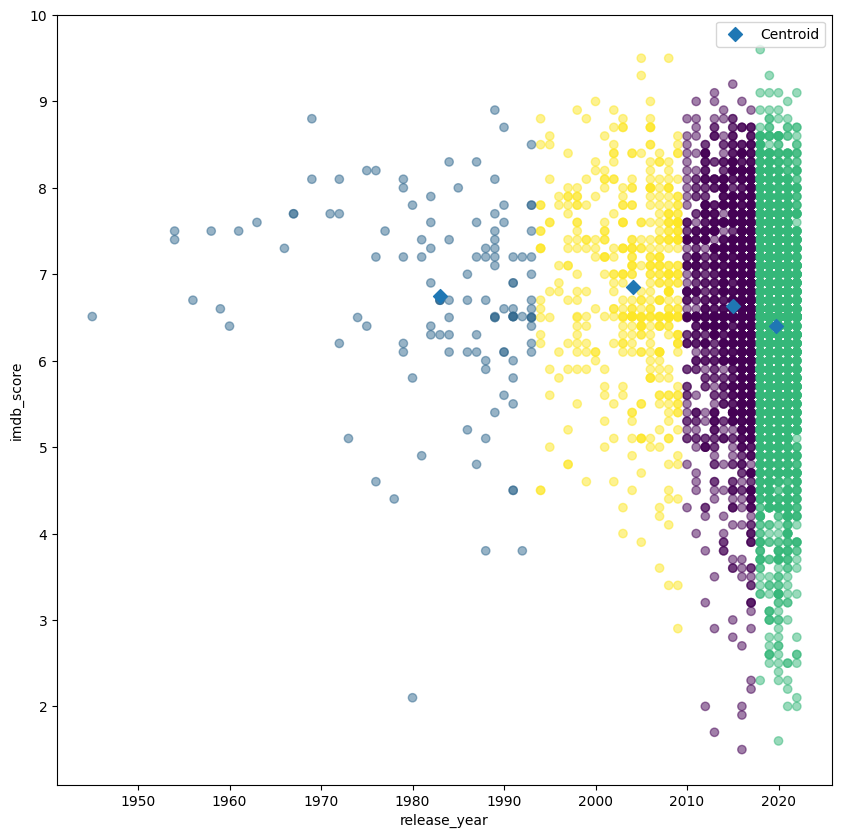

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(nilai_x, nilai_y, alpha=0.5, c=labels)
plt.scatter(centroid_xc, centroid_yc, marker='D', s=50, label='Centroid')
plt.xlabel('release_year')
plt.ylabel('imdb_score')
plt.legend()
plt.show()

In [25]:
cluster_range = range(1,8)
inertias = []
for k in cluster_range:
    dataset_model = KMeans(n_clusters=k)
    dataset_model.fit(point)
    inertias.append(dataset_model.inertia_)

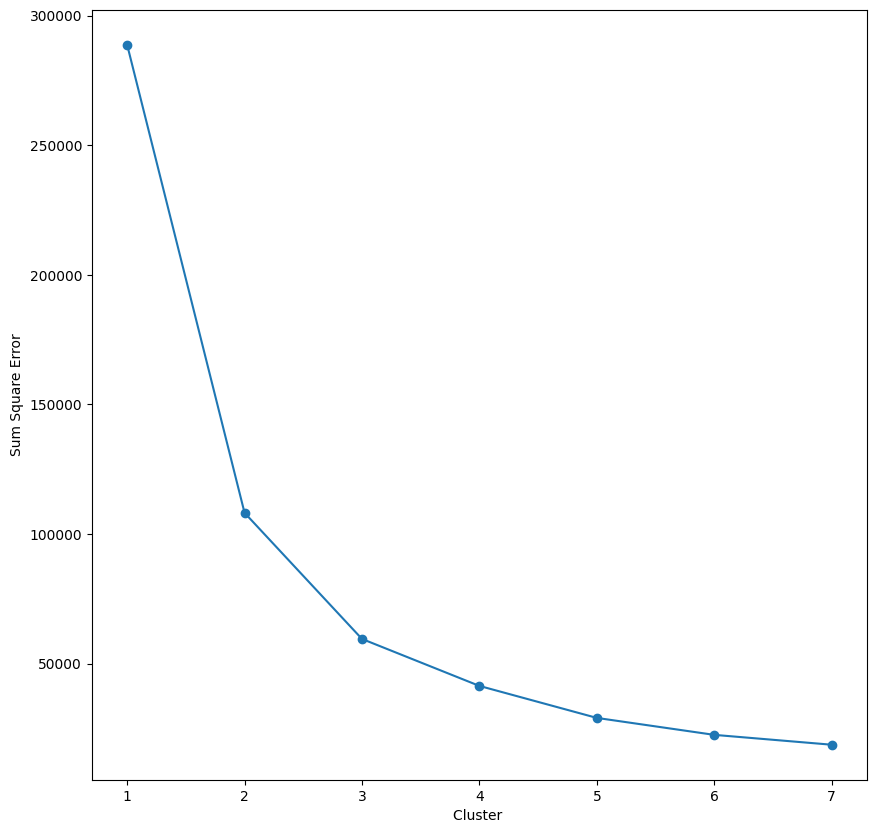

In [26]:
plt.figure(figsize=(10,10))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ')
plt.ylabel('Sum Square Error')
plt.xticks(cluster_range)
plt.show()

In [28]:
df.to_csv("titlesUnsupervised.csv")